In [24]:
#주피터 노트북에서 작성된 코드입니다.
import pandas as pd
train = pd.read_table('restaurant_crawler.txt') #raw data

In [26]:
print('총 샘플의 수 :',len(train))

총 샘플의 수 : 29


In [27]:
train[-5:]

,0,맛있어욥 또시킬게욥,5,1989'sPIZZA-인천직영점
24,25,배달 기사가 음식을 잘못 갖다놔서 문제가 생겼지만 사장님의 빠른 대처와 잘못이 없으...,5,1989'sPIZZA-인천직영점
25,26,너무 맛있게 잘 먹었습니다,5,1989'sPIZZA-인천직영점
26,27,빠른 배달에 따뜻하고 쫄깃한 피자 맛있게 먹었습니다. 스파게티도 맛나구요. 서비스 ...,5,1989'sPIZZA-인천직영점
27,28,난 피자도다 스파게티가 더 좋다~ 하지만 둘다 잘먹었다ㅋ,4,1989'sPIZZA-인천직영점
28,29,조금식었지만 맛있었습니다.,5,1989'sPIZZA-인천직영점


In [40]:
#a는 추가 모드. 혹시모를 데이터 날림을 방지하기 위함, 데이터 전부 모은 뒤에 여기로 와서 0/1데이터로 만들기.
w_file = open("restaurant_review_0or1.txt", "a",encoding='utf-8') 
r_file = open('restaurant_crawler.txt', 'r', encoding='UTF8')

In [29]:
#0은 id, 1은 리뷰, 2는 별점, 3은 식당. 
w_file.write('id'+'\t'+'document'+'\t'+'label'+'\n')
while True:
    line = r_file.readline()
    if not line: 
        break
    column = line.split()
    review = ' '.join(column[1:-2])
    if column[-2] == '5':
        w_file.write(column[0])
        w_file.write('\t')
        w_file.write(review)
        w_file.write('\t')
        w_file.write('1')
        w_file.write('\n')
    elif column[-2] == '1' or column[-2] == '2' or column[-2] == '3':
        w_file.write(column[0])
        w_file.write('\t')
        w_file.write(review)
        w_file.write('\t')
        w_file.write('0')
        w_file.write('\n')
    #print(type(column[-2]))
    #print(review)

In [41]:
w_file.close()
r_file.close()

In [36]:
data = pd.read_table('restaurant_review_0or1.txt')

<AxesSubplot:>

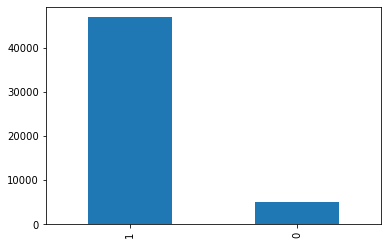

In [37]:
data['label'].value_counts().plot(kind = 'bar')

In [38]:
#label별 비율
sum_ = data['label'].value_counts().sum()
data['label'].value_counts()/sum_

1    0.902742
0    0.097258
Name: label, dtype: float64

In [39]:
data[-5:]

,id,document,label
51919,2006,맛있게 잘 먹었습니다 양도 많아고 치즈토핑도 많았어요,1
51920,2007,맛있어요 잘먹었네요 짱입니다,1
51921,2008,맛있게 잘 먹었습니다 간만에 만족스런 식사를 햇네요 번창하세요,1
51922,2009,약간 고기가 덜 익은거 같네요 이점이 좀 아쉽네요,0
51923,2010,다이어트 중인데 식사챙기기 힘들어 주문했어요 어마어마한 양에 놀랐고 야채 신선도도 ...,1


In [35]:
print(data['label'])

0        1
1        1
2        1
3        1
4        1
        ..
51949    1
51950    1
51951    1
51952    1
51953    1
Name: label, Length: 51954, dtype: object
